# Detecção de tumores cerebrais usando aprendizado de máquina

## Autor

Danilo César Tertuliano Melo - 221031149

Github: DaniloCTM

----
## Objetivo

Esse artigo tem como objetivo utilizar aprendizado de máquina para identificar a presença de tumores cerebrais em imagens de ressonância magnética.

----
## Passo 1 - configurando o ambiente

Importando as imagens do dataset [brain-mri-images-for-brain-tumor-detection](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection) disponível no kaggle.

In [ ]:
#importando as imagens do dataset

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Instalando a biblioteca fastai

In [ ]:
!pip install fastai

---
## Passo 2: organizando os dados
Importando a biblioteca de visão computacional do fastai, definindo o caminho para o diretório com os dados e exibindo um desses dados.

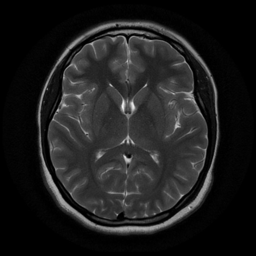

In [3]:
from fastai.vision.all import *

path = Path('/kaggle/input/brain-mri-images-for-brain-tumor-detection')
dest = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/1 no.jpeg'
im = Image.open(dest)
im.to_thumb(256,256)

Em seguida, verificamos se foi encontrado algum problema nos arquivos do dataset.

In [4]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

---
## passo 3: Trainando o modelo
Primeiro, criamos os conjuntos de dados por meio da função `DataBlock()`, onde definimos:
* O formato de entrada e saída dos dados
* O tamanho do conjunto de validação e treinamento
* O tamanho das imagens passadas para o modelo

Em seguida, exibimos uma batch com alguns dos dados.

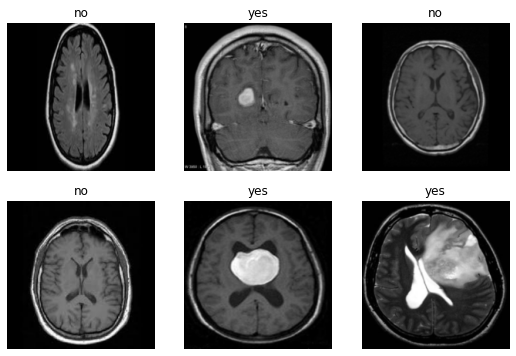

In [5]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Agora realizamos de fato o treinamento usando as funções da biblioteca fastai. Para isso, criamos um modelo de rede neural convolucional usando a função `cnn_leaner()` e, em seguida, ajustamos os pesos da rede por meio da função `fine_tune()`.

In [11]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.045051,0.935776,0.277228,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.331850,0.736047,0.207921,00:43
1,0.213862,0.027635,0.009901,00:43
2,0.152308,0.014389,0.000000,00:42


---
## Passo 4: Testando o modelo
Por fim, podemos selecionar algumas imagens para testar o modelo. Nesse teste, ele retorna a classificação da imagem e apresenta a probabilidade de ter um tumor na imagem.

In [12]:
dest = '/kaggle/input/normalbrain/normal1.jpg'
is_tumor,_,probs = learn.predict(PILImage.create(dest))
print(f"This is a: {is_tumor}.")
print(f"Probability it's a tumor: {1-probs[0]:.4f}")

This is a: no.
Probability it's a tumor: 0.0002


----
# Conclusão
É possível perceber que o modelo conseguiu um bom resultado, pois a taxa de erro durante o treinamento chegou a zero. No entanto, importante destacar que a utilização de um bom conjunto de dados pode ter sido um fator importante para esse resultado, caso os dados tivessem sidos coletados do duck duck go, é provável que a precisão do modelo fosse inferior.


